In [6]:
import os
import pickle
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
spark_version = 'spark-3.1.2'
os.environ['SPARK_VERSION']=spark_version
# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.2.tgz
!pip install -q findspark
# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3.2"


Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [7]:
dataset = pd.read_csv('03_data.csv')
#View all the columns
pd.set_option('display.max_columns', None)
dataset.head()

,Unnamed: 0,precio_m2,superficie_total,categoria,dormitorios,baños,cocheras,colonia,alcaldia,dist_metro
0,0,60144.927536,138.0,departamento,2.0,3.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,499.558324
1,1,104651.162791,172.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,755.632370
2,2,85919.540230,174.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,772.890462
3,3,5092.622951,183.0,departamento,3.0,3.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,1004.848305
4,4,93125.000000,160.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,480.029999


In [8]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = dataset[['superficie_total', 'dormitorios', 'baños', 'cocheras', 'dist_metro']]
y = dataset["precio_m2"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(6327, 5) (6327, 1)


In [ ]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
#classifier.fit(X_train, y_train)
### END SOLUTION

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

In [ ]:
import pickle
with open('bike_model_xgboost.pkl', 'wb') as file:
pickle.dump(classifier, file)

IndentationError: ignored

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [11]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

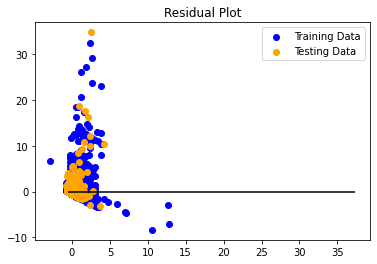

In [12]:
### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [13]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3382031674999397, R2: 0.1808200091282013


In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4575407332064233, R2: 0.2397320226773333
